In [ ]:
import os
import numpy as np
import pandas as pd

from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, ConfusionMatrixDisplay

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/CS135_Project_B/

/content/drive/MyDrive/CS135_Project_B


In [ ]:
!pwd

/content/drive/MyDrive/CS135_Project_B


In [ ]:
data_dir = os.path.abspath("data_fashion/")

In [ ]:
train_x = pd.read_csv(os.path.join(data_dir, "x_train.csv")).to_numpy()
train_y_df = pd.read_csv(os.path.join(data_dir, "y_train.csv"))

valid_x = pd.read_csv(os.path.join(data_dir, "x_valid.csv")).to_numpy()
valid_y_df = pd.read_csv(os.path.join(data_dir, "y_valid.csv"))

for label, arr in [('train', train_x), ('valid', valid_x)]:
  print("Contents of %s_x.csv: arr of shape %s" % (label, str(arr.shape)))

Contents of train_x.csv: arr of shape (2102, 784)
Contents of valid_x.csv: arr of shape (600, 784)


In [ ]:
train_y_df['class_name'].value_counts()

sandal      800
sneaker     800
dress       400
pullover    100
top           1
trouser       1
Name: class_name, dtype: int64

In [ ]:
valid_y_df['class_name'].value_counts()

dress       100
trouser     100
sandal      100
top         100
pullover    100
sneaker     100
Name: class_name, dtype: int64

In [ ]:
#scaler = MinMaxScaler()
#train_x = scaler.fit_transform(train_x)
#valid_x = scaler.transform(valid_x)

In [ ]:
train_x = train_x.astype('float32')
valid_x = valid_x.astype('float32')
train_x = train_x/255.0
valid_x = valid_x/255.0

In [ ]:
n_runs = 10

In [ ]:
alphas = list(np.logspace(-10, 10, 11))
alphas = [1e-4, 0.001, 0.01, 1, 10, 100]
print(alphas)

[0.0001, 0.001, 0.01, 1, 10, 100]


In [ ]:
models = []
train_balanced_accs = []
valid_balanced_accs = []

for i in alphas:

  best_model = None
  best_balanced_acc = 0.0

  for j in range(n_runs):

    mlp = MLPClassifier(
          hidden_layer_sizes=(512,),
          activation='identity',
          alpha=i,
          solver='adam',
          random_state=j,
          learning_rate_init = 0.1,
          early_stopping = True
    )
    mlp.fit(train_x, train_y_df['class_name'])

    valid_yhat = mlp.predict(valid_x)
    balanced_acc = balanced_accuracy_score(valid_y_df['class_name'], valid_yhat)
    print(f"random_state: {j}, validation_score: {balanced_acc:.5f}")
    if balanced_acc > best_balanced_acc:
      best_balanced_acc = balanced_acc
      best_model = mlp

  models.append(best_model)

  train_yhat = best_model.predict(train_x)
  valid_yhat = best_model.predict(valid_x)

  train_balanced_acc = balanced_accuracy_score(train_y_df['class_name'], train_yhat)
  valid_balanced_acc = balanced_accuracy_score(valid_y_df['class_name'], valid_yhat)
  print(f"alpha: {i}, train_score: {train_balanced_acc:.5f}, validation_score: {valid_balanced_acc:.5f}")

  train_balanced_accs.append(train_balanced_acc)
  valid_balanced_accs.append(valid_balanced_acc)

random_state: 0, validation_score: 0.77833
random_state: 1, validation_score: 0.64167
random_state: 2, validation_score: 0.74167
random_state: 3, validation_score: 0.63833
random_state: 4, validation_score: 0.77167
random_state: 5, validation_score: 0.76500
random_state: 6, validation_score: 0.71500
random_state: 7, validation_score: 0.64667
random_state: 8, validation_score: 0.65500
random_state: 9, validation_score: 0.65167
alpha: 0.0001, train_score: 0.97021, validation_score: 0.77833
random_state: 0, validation_score: 0.66167
random_state: 1, validation_score: 0.66667
random_state: 2, validation_score: 0.63333
random_state: 3, validation_score: 0.60500
random_state: 4, validation_score: 0.68167
random_state: 5, validation_score: 0.68167
random_state: 6, validation_score: 0.72333
random_state: 7, validation_score: 0.74667
random_state: 8, validation_score: 0.63833
random_state: 9, validation_score: 0.87000
alpha: 0.001, train_score: 0.99083, validation_score: 0.87000
random_state: 0

In [ ]:
max_index = valid_balanced_accs.index(max(valid_balanced_accs))
alpha_best = alphas[max_index]
print(alpha_best)

0.001


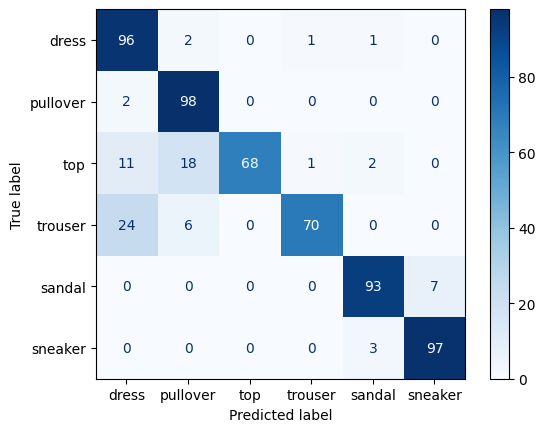

In [ ]:
model_best = models[max_index]
valid_yhat = model_best.predict(valid_x)

class_names = ['dress', 'pullover', 'top', 'trouser', 'sandal', 'sneaker']
cm = confusion_matrix(valid_y_df['class_name'], valid_yhat, labels=class_names)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap='Blues', values_format='d')

In [ ]:
train_x = pd.read_csv(os.path.join(data_dir, "x_train.csv"))
train_y_df = pd.read_csv(os.path.join(data_dir, "y_train.csv"))

valid_x = pd.read_csv(os.path.join(data_dir, "x_valid.csv")).to_numpy()
valid_y_df = pd.read_csv(os.path.join(data_dir, "y_valid.csv"))

In [ ]:
train_x['class_name'] = train_y_df['class_name']
duplicate_counts = {'pullover': 4, 'top': 400, 'trouser': 400}
df = pd.DataFrame()

for class_name, count in duplicate_counts.items():
    subset = train_x[train_x['class_name'] == class_name]
    duplicated_subset = pd.concat([subset] * count, ignore_index=True)
    df = pd.concat([df, duplicated_subset], ignore_index=True)

other_classes = train_x[~train_x['class_name'].isin(duplicate_counts.keys())]
df = pd.concat([df, other_classes], ignore_index=True)

df = df.sample(frac=1, random_state=42).reset_index(drop=True)
df['class_name'].value_counts()

sandal      800
sneaker     800
dress       400
trouser     400
pullover    400
top         400
Name: class_name, dtype: int64

In [ ]:
train_x = (df.loc[:, df.columns != 'class_name']).to_numpy()

In [ ]:
for label, arr in [('train', train_x), ('valid', valid_x)]:
  print("Contents of %s_x.csv: arr of shape %s" % (label, str(arr.shape)))

Contents of train_x.csv: arr of shape (3200, 784)
Contents of valid_x.csv: arr of shape (600, 784)


In [ ]:
train_y_df = df['class_name']
train_y_df.value_counts()

sandal      800
sneaker     800
dress       400
trouser     400
pullover    400
top         400
Name: class_name, dtype: int64

In [ ]:
valid_y_df['class_name'].value_counts()

dress       100
trouser     100
sandal      100
top         100
pullover    100
sneaker     100
Name: class_name, dtype: int64

In [ ]:
#scaler = MinMaxScaler()
#train_x = scaler.fit_transform(train_x)
#valid_x = scaler.transform(valid_x)

In [ ]:
train_x = train_x.astype('float32')
valid_x = valid_x.astype('float32')
train_x = train_x/255.0
valid_x = valid_x/255.0

In [ ]:
n_runs = 15

In [ ]:
#alphas = list(np.logspace(-10, 10, 11))
alphas = [1e-4, 0.001, 0.01, 1, 10, 100]
print(alphas)

[0.0001, 0.001, 0.01, 1, 10, 100]


In [ ]:
models = []
train_balanced_accs = []
valid_balanced_accs = []

for i in alphas:

  best_model = None
  best_balanced_acc = 0.0

  for j in range(n_runs):

    mlp = MLPClassifier(
          hidden_layer_sizes=(512,),
          activation='identity',
          alpha=i,
          solver='adam',
          random_state=j,
          learning_rate_init = 0.1,
          early_stopping = True
    )
    mlp.fit(train_x, train_y_df)

    valid_yhat = mlp.predict(valid_x)
    balanced_acc = balanced_accuracy_score(valid_y_df['class_name'], valid_yhat)
    print(f"random_state: {j}, validation_score: {balanced_acc:.5f}")
    if balanced_acc > best_balanced_acc:
      best_balanced_acc = balanced_acc
      best_model = mlp

  models.append(best_model)

  train_yhat = best_model.predict(train_x)
  valid_yhat = best_model.predict(valid_x)

  train_balanced_acc = balanced_accuracy_score(train_y_df, train_yhat)
  valid_balanced_acc = balanced_accuracy_score(valid_y_df['class_name'], valid_yhat)
  print(f"alpha: {i}, train_score: {train_balanced_acc:.5f}, validation_score: {valid_balanced_acc:.5f}")

  train_balanced_accs.append(train_balanced_acc)
  valid_balanced_accs.append(valid_balanced_acc)

random_state: 0, validation_score: 0.77833
random_state: 1, validation_score: 0.88167
random_state: 2, validation_score: 0.80333
random_state: 3, validation_score: 0.85333
random_state: 4, validation_score: 0.90667
random_state: 5, validation_score: 0.83500
random_state: 6, validation_score: 0.75500
random_state: 7, validation_score: 0.77167
random_state: 8, validation_score: 0.86667
random_state: 9, validation_score: 0.68667
random_state: 10, validation_score: 0.83333
random_state: 11, validation_score: 0.83333
random_state: 12, validation_score: 0.72333
random_state: 13, validation_score: 0.78500
random_state: 14, validation_score: 0.80833
alpha: 0.0001, train_score: 0.99167, validation_score: 0.90667
random_state: 0, validation_score: 0.79667
random_state: 1, validation_score: 0.89167
random_state: 2, validation_score: 0.88833
random_state: 3, validation_score: 0.84333
random_state: 4, validation_score: 0.75500
random_state: 5, validation_score: 0.89333
random_state: 6, validation_s

In [ ]:
max_index = valid_balanced_accs.index(max(valid_balanced_accs))
alpha_best = alphas[max_index]
print(alpha_best)

1


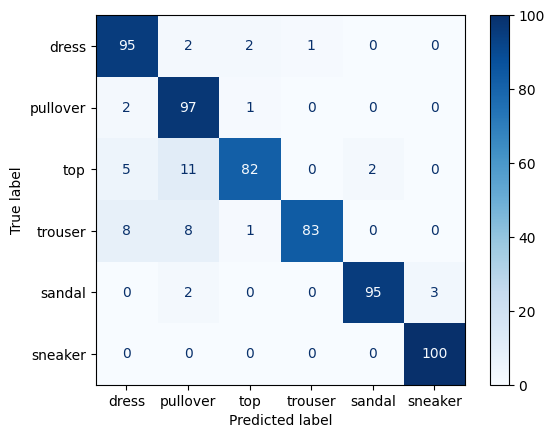

In [ ]:
model_best = models[max_index]
valid_yhat = model_best.predict(valid_x)

class_names = ['dress', 'pullover', 'top', 'trouser', 'sandal', 'sneaker']
cm = confusion_matrix(valid_y_df['class_name'], valid_yhat, labels=class_names)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap='Blues', values_format='d')

In [ ]:
test_x = pd.read_csv(os.path.join(data_dir, "x_test.csv")).to_numpy()

In [ ]:
test_x = test_x.astype('float32')
test_x = test_x/255.0

In [ ]:
test_yhat = model_best.predict(test_x)

In [ ]:
np.savetxt('Q1/yhat_test.txt', test_yhat, delimiter='\n', fmt='%s')